In [1]:
import pandas as pd

In [2]:
dataframe = pd.read_csv("csv/82000278_Toamnei_PM10_2021_12.csv")

In [3]:
dataframe.head()

,time,latitude,longitude,altitude,pm10
0,1638309618,45.651464,25.615426,538,9
1,1638309678,45.651464,25.615426,538,9
2,1638309738,45.651464,25.615426,538,10
3,1638309798,45.651464,25.615426,538,9
4,1638309858,45.651464,25.615426,538,9


In [4]:
dataframe_size = len(dataframe.index)
dataframe_size

44638

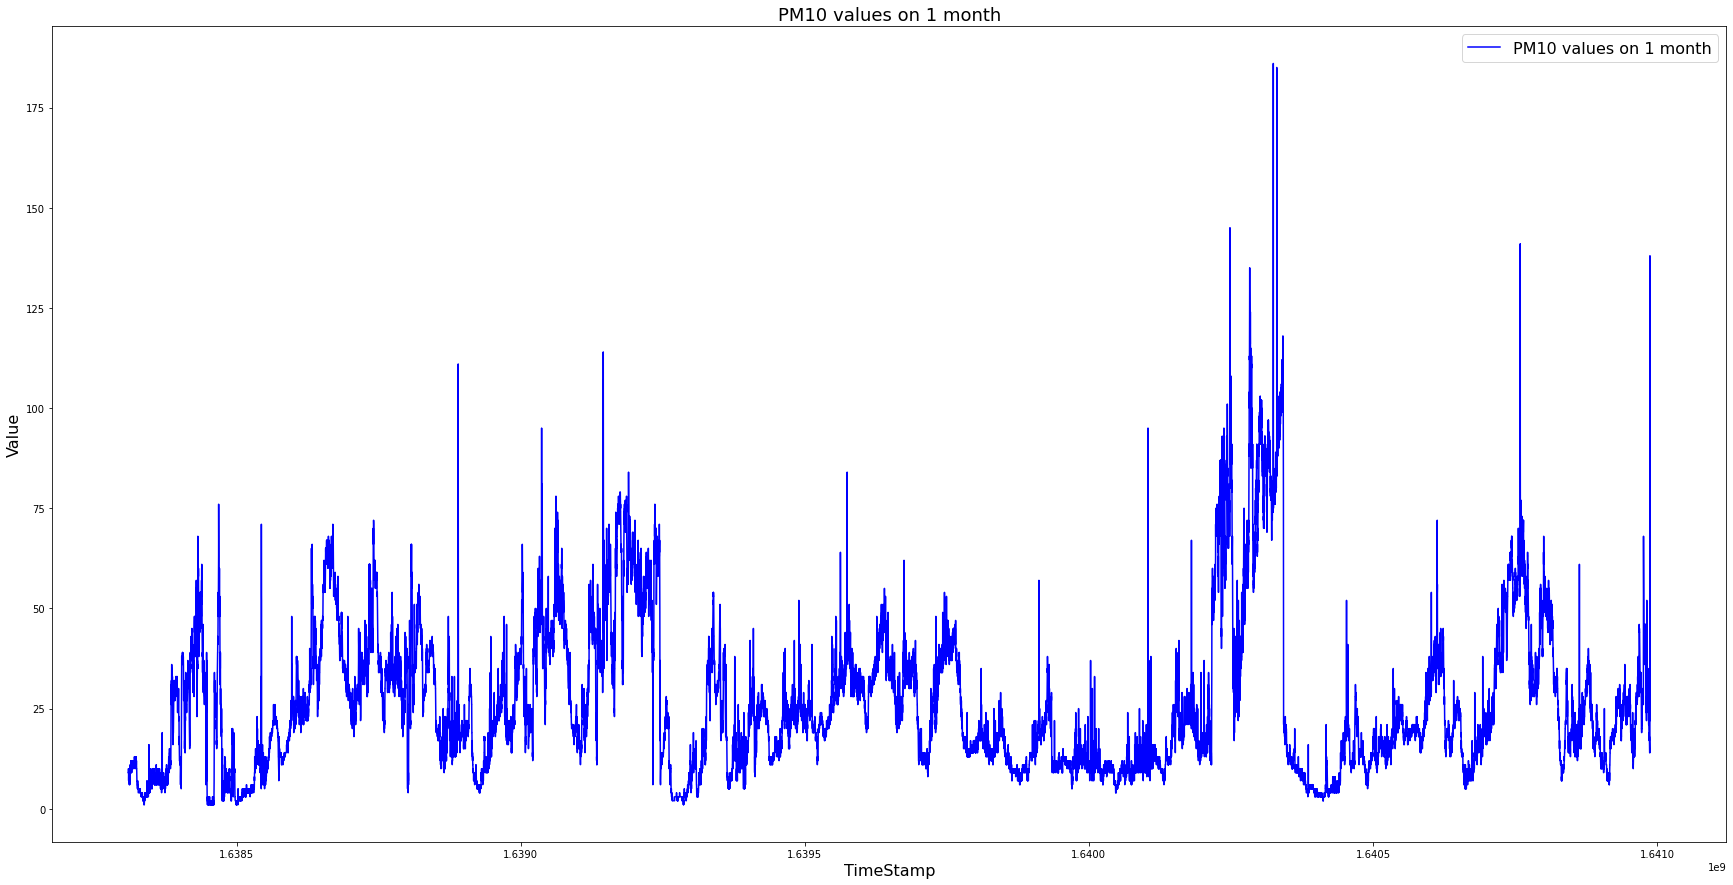

In [5]:
import matplotlib.pyplot as plt
plt.close("all")
# fig = plt.figure(figsize=(20,10), frameon=True)
plt.figure(figsize=(30,15))
plt.plot(dataframe.get('time'), dataframe.get('pm10'), label="PM10 values on 1 month", color = "blue")
# plt.scatter(dataframe.get('_source.TimeStamp'), dataframe.get('_source.Value'), color = "red")
plt.xlabel("TimeStamp", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("PM10 values on 1 month", fontsize=18)
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Tests_1month.jpg', bbox_inches = 'tight')
plt.show()

C:\VALI\Programs\Miniconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


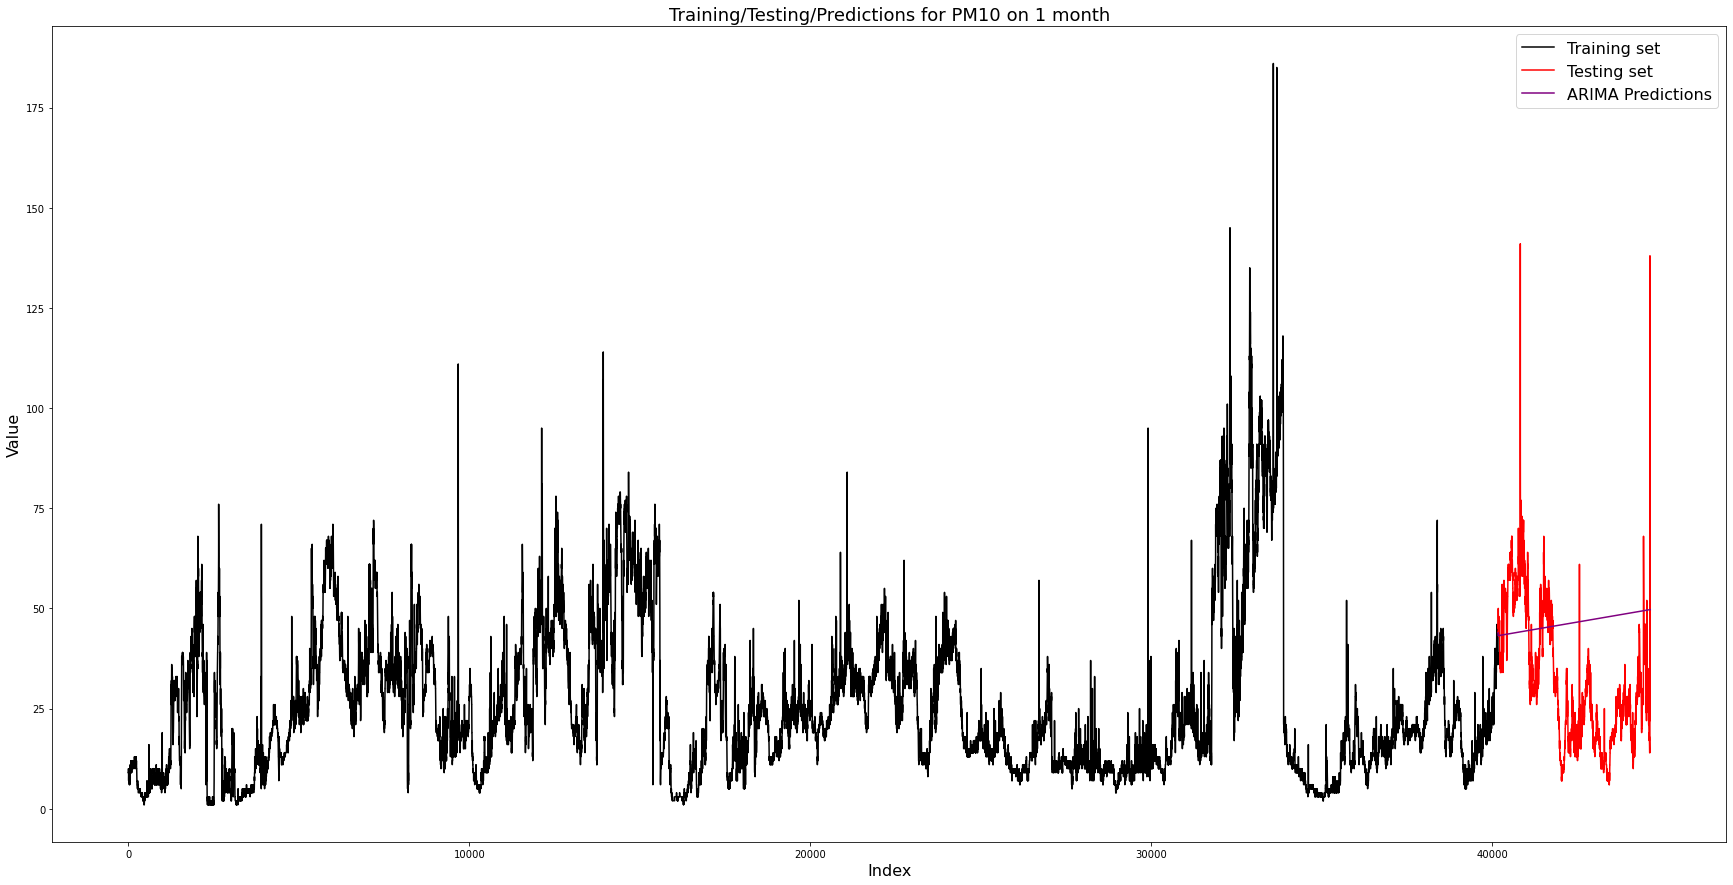

RMSE:  22.854195458867835


In [6]:
train = dataframe[dataframe.index < dataframe_size*(90/100)]
test = dataframe[dataframe.index >= dataframe_size*(90/100)]
# train = dataframe[dataframe.index < dataframe_size*(3/4)]
# test = dataframe[dataframe.index >= dataframe_size*(3/4)]

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
y = train['pm10']

ARMAmodel = ARIMA(y, order=(2,2,2))
ARMAmodel = ARMAmodel.fit()
y_pred = ARMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha=0.05)
y_pred_df['Predictions'] = ARMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"]


import matplotlib.pyplot as plt
plt.close("all")
plt.figure(figsize=(30,15))
plt.plot(train.index, train.get('pm10'), color = "black", label = "Training set")
plt.plot(test.index, test.get('pm10'), color = "red", label = "Testing set")
plt.xlabel("Index", fontsize=16)
plt.ylabel("Value", fontsize=16)
plt.title("Training/Testing/Predictions for PM10 on 1 month", fontsize=18)
plt.plot(y_pred_out, color='purple', label = 'ARIMA Predictions')
plt.legend(fontsize=16)
plt.savefig('plots_from_csv/CSV_Tests_1month_ARIMA', bbox_inches = 'tight')
plt.show()


import numpy as np
from sklearn.metrics import mean_squared_error

arima_rmse2 = np.sqrt(mean_squared_error(test["pm10"].values, y_pred_df["Predictions"]))
print("RMSE: ", arima_rmse2)